In [1]:
!pip install antigranular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.7 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
import antigranular as ag
session = ag.login("tM3bEZVPTilWwiqTJFkvtNmA4cqFUOBb", "X65m+SLZO6Hxl5h2JaAkn1pd+dWnOkP6NWR8VUam5LVLeNwPPmQntNRX1kY3PjbN", dataset = "Car Evaluation")

Loading dataset "Car Evaluation" to the kernel...
Dataset "Car Evaluation" loaded to the kernel as car_evaluation
Connected to Antigranular server session id: 9b3d8664-8de6-45b2-b748-3d9627f30eec, the session will time out if idle for 60 minutes
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server
🚀 Everything's set up and ready to roll!


In [5]:
%%ag
import pandas as pd

In [6]:
%%ag
train_x = car_evaluation["train_x"]
train_y = car_evaluation["train_y"]
test_x = car_evaluation["test_x"]

ag_print(train_x.columns)
ag_print(train_y.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')
Index(['class'], dtype='object')



In [7]:
session.privacy_odometer()

{'total_epsilon_used': 0.0,
 'total_delta_used': 0.0,
 'library_costs': None,
 'dataset_costs': None}

## Data Preprocessing

In [8]:
%%ag
unique_categories = {}
for column in test_x.columns:
    unique_categories.update({column: test_x[column].unique().tolist()})
ag_print(unique_categories)


{'buying': ['high', 'med', 'low', 'vhigh'], 'maint': ['high', 'low', 'vhigh', 'med'], 'doors': ['4', '2', '5more', '3'], 'persons': ['2', '4', 'more'], 'lug_boot': ['med', 'big', 'small'], 'safety': ['high', 'med', 'low']}



In [9]:
%%ag
encoding_scheme_train_x_gen = {}

for column, values in unique_categories.items():
    encoding_scheme_train_x_gen[column] = {value: idx for idx, value in zip(range(len(values)), values)}

ag_print(encoding_scheme_train_x_gen)

{'buying': {'high': 0, 'med': 1, 'low': 2, 'vhigh': 3}, 'maint': {'high': 0, 'low': 1, 'vhigh': 2, 'med': 3}, 'doors': {'4': 0, '2': 1, '5more': 2, '3': 3}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 0, 'big': 1, 'small': 2}, 'safety': {'high': 0, 'med': 1, 'low': 2}}



In [10]:
%%ag
encoding_scheme_train_x = {'buying': {'high': 2, 'med': 1, 'low': 0, 'vhigh': 3}, 'maint': {'high': 2, 'low': 0, 'vhigh': 3, 'med': 1}, 'doors': {'4': 2, '2': 0, '5more': 2, '3': 1}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 1, 'big': 2, 'small': 0}, 'safety': {'high': 2, 'med': 1, 'low': 0}}


In [11]:
%%ag
ag_print(encoding_scheme_train_x)

{'buying': {'high': 2, 'med': 1, 'low': 0, 'vhigh': 3}, 'maint': {'high': 2, 'low': 0, 'vhigh': 3, 'med': 1}, 'doors': {'4': 2, '2': 0, '5more': 2, '3': 1}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 1, 'big': 2, 'small': 0}, 'safety': {'high': 2, 'med': 1, 'low': 0}}



Apply Encoding for train_x

In [12]:
%%ag
for col, value in encoding_scheme_train_x.items():
    train_x[col] = train_x[col].map(value, eps=1)

In [13]:
%%ag
ag_print(train_x.describe(eps=.1))

            buying        maint        doors      persons     lug_boot  \
count  1382.000000  1382.000000  1382.000000  1382.000000  1382.000000   
mean      2.033506     1.521595     1.827179     0.865683     1.378958   
std       0.937707     1.960731     1.773810     1.917845     1.832155   
min       2.157819     2.447771     1.341982     1.264269     2.944067   
25%       0.172378     0.051211     1.558358     3.134922     0.439073   
50%       3.567041     1.891505     0.141640     3.748978     1.401744   
75%       2.607706     1.860748     3.310653     1.419852     3.405690   
max       3.408839     3.874290     3.708163     1.985622     1.867475   

            safety  
count  1382.000000  
mean      1.539298  
std       1.943435  
min       0.405393  
25%       1.453543  
50%       1.431422  
75%       1.894327  
max       2.254170  



Apply encoding train_y

In [14]:
%%ag
train_y_schema = {
    'unacc': 0,
    'acc': 1,
    'good': 2,
    'vgood': 3
}

train_y[train_y.columns[0]] = train_y[train_y.columns[0]].map(train_y_schema, eps=1)

In [15]:
%%ag
ag_print(train_y.describe(eps=.1))

             class
count  1382.000000
mean      0.387740
std       1.610836
min       0.582309
25%       1.426156
50%       0.803432
75%       1.250902
max       3.793631



## Data Visualization

Join two dataset train_x and train_y

In [16]:
%%ag
train_data = train_x.join(train_y, how="inner")

In [17]:
%%ag
import op_snsql

/usr/local/lib/python3.10/site-packages/opendp/typing.py:28: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: 'bool',  # np.bool_
/usr/local/lib/python3.10/site-packages/opendp/accuracy.py:218: DeprecationWarning: invalid escape sequence '\g'
  """Convert a discrete Laplacian scale into an accuracy estimate (tolerance) at a statistical significance level `alpha`.



In [18]:
%%ag
privacy = op_snsql.Privacy(epsilon=1.0)
reader = op_snsql.from_df(df=train_data, privacy=privacy)

In [19]:
%%ag
result = reader.execute("SELECT class, AVG(buying), AVG(maint), AVG(doors), AVG(persons), AVG(lug_boot), AVG(safety) FROM df.table GROUP BY class")
export(result, 'result')

Setting up exported variable in local environment: result


In [20]:
%%ag
export(train_x.columns, 'train_x_columns')

Setting up exported variable in local environment: train_x_columns


In [21]:
new_columns = ['class'] + train_x_columns.tolist()
df = pd.DataFrame(result[1:], columns=new_columns)

In [22]:
df

,class,buying,maint,doors,persons,lug_boot,safety
0,0,1.620123,1.637949,1.200614,0.801433,0.940391,0.738193
1,1,1.435216,1.386139,1.345395,1.452145,1.084967,1.529801
2,2,0.431034,0.322034,1.310345,1.070175,1.000000,1.295082
3,3,0.333333,0.860000,1.520833,1.367347,1.687500,1.958333


In [23]:
df.drop(columns=['class'], inplace=True)

<Axes: >

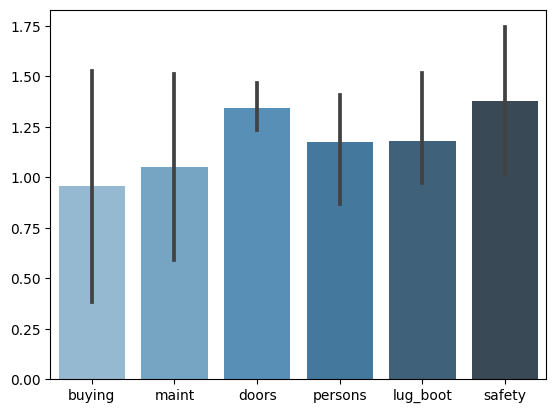

In [24]:
# sns barplot
sns.barplot(data=df, palette="Blues_d")

Observations:

- **buying**: There are noticeable differences in the mean buying price among different classes.
- **maint**: Similar to buying, maintenance cost also shows some variation.
- **safety**: Safety shows clear variations, and looks like ***most important***.
  
The remaining features (**doors**, **persons**, **lug_boot**) exhibit less variation among classes.

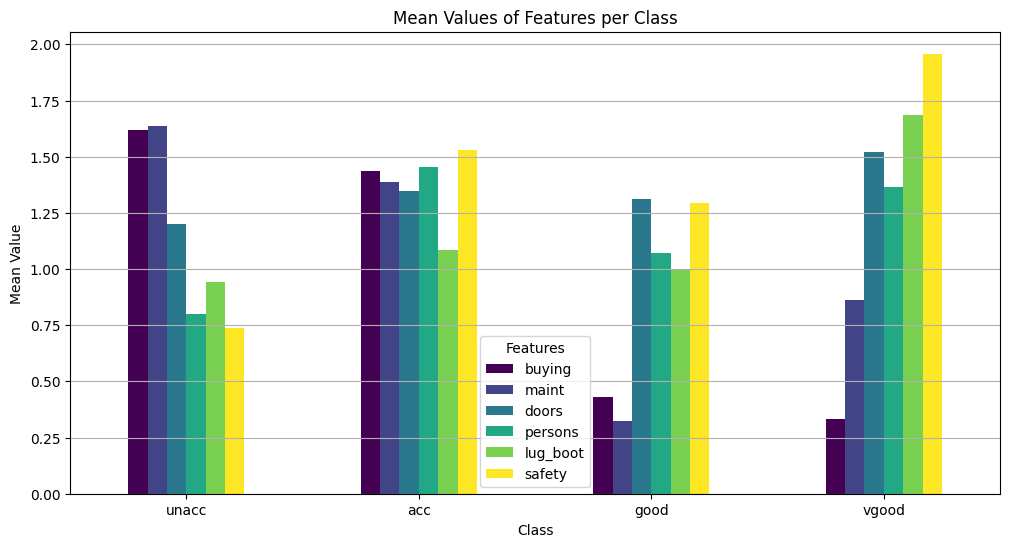

In [25]:
ax = df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Mean Values of Features per Class')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.xticks(ticks=[0, 1, 2, 3], labels=['unacc', 'acc', 'good', 'vgood'], rotation=0)
plt.legend(title='Features')
plt.grid(axis='y')

## Observations:
1. **Safety Considerations:**
   - 'vgood' cars tend to have the highest mean safety rating, suggesting that safety is a crucial factor in determining the highest class of cars.
   - 'unacc' (unacceptable) cars have the lowest mean safety rating, highlighting that lower safety ratings are a significant factor for classifying cars into this undesirable category.

2. **Economic Aspects (Buying & Maintenance):**
   - 'unacc' cars tend to have higher mean buying and maintenance costs, indicating that more expensive and high-maintenance cars are often deemed less acceptable.
   - 'good' cars have the lowest mean buying and maintenance costs, hinting that more economically friendly cars are often classified in this category.

3. **Luggage Boot Size:**
   - 'vgood' cars have the highest mean luggage boot size, showing a potential preference for larger boot sizes in this class.
   - The other classes do not show significant variations in the luggage boot size.

4. **Capacity (Persons & Doors):**
   - 'unacc' cars have a lower mean value for persons, suggesting that cars with lower seating capacity tend to be categorized as unacceptable.
   - There isn't a clear pattern for the number of doors across classes, implying that this feature might not be as impactful in classifying cars.

### Summary:

- Safety is a pivotal factor across all classes, with higher safety ratings generally correlating with more favorable classes.
- Economic aspects (buying and maintenance costs) appear to significantly impact the classification, especially distinguishing 'unacc' and 'good' cars.
- Features like the number of doors might not be significant in determining car classes due to the lack of clear variation across different classes.

This analysis could inform the feature selection or weighting in a predictive model, focusing on safety and economic aspects as potentially influential variables.

In [26]:
%%ag
ag_print(train_data['class'].describe(eps=1))

count    1382.000000
mean        0.464057
std         0.862809
min         0.946587
25%         0.270315
50%         0.832590
75%         0.489490
max         3.087981
Name: series, dtype: float64



In [27]:
session.privacy_odometer()

{'total_epsilon_used': 21.2,
 'total_delta_used': 1.5543122344752192e-15,
 'library_costs': None,
 'dataset_costs': None}

## Rule based Model

In [28]:
%%ag
# encode test x
for col, value in encoding_scheme_train_x.items():
    test_x[col] = test_x[col].map(value)

In [29]:
%%ag
ag_print(test_x)

     buying  maint  doors  persons  lug_boot  safety
0         2      2      2        0         1       2
1         1      0      0        1         1       1
2         2      2      2        0         2       1
3         0      2      2        1         1       1
4         1      0      2        2         1       0
..      ...    ...    ...      ...       ...     ...
341       3      3      2        2         0       1
342       3      1      2        0         1       1
343       1      0      0        2         0       0
344       3      3      2        2         0       2
345       1      1      0        0         1       1

[346 rows x 6 columns]



In [30]:
%%ag
result = reader.execute("SELECT count(class) FROM df.table GROUP BY class")


In [31]:
%%ag
ag_print(result)

[['???'], [972], [301], [61], [46]]



In [32]:
%%ag
export(result, 'result')

Setting up exported variable in local environment: result


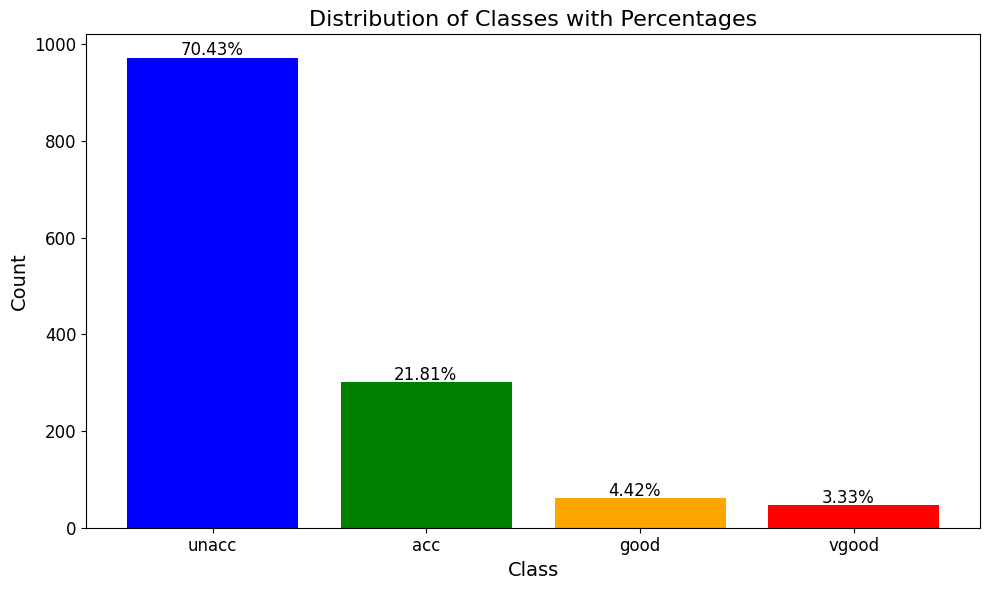

In [33]:
data_counts = [item[0] for item in result[1:]]
labels = ['unacc', 'acc', 'good', 'vgood']

total_count = sum(data_counts)

# Calculate percentages
percentages = [(count/total_count)*100 for count in data_counts]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, data_counts, color=['blue', 'green', 'orange', 'red'])

for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, # position percentage at the top
             bar.get_height() + 5,
             f'{percentage:.2f}%',
             fontsize=12)

plt.title('Distribution of Classes with Percentages', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


### Observations:
* The data is imbalanced, with the 'unacc' category dominating the distribution.
* 'vgood' and 'good' categories are considerably very less frequent in the data.

The class 'unacc' has the highest count and represents the majority of the data, hence can be default for rule based model

In [34]:
%%ag
# simple rule based
def rule_based_model(data):
    predictions = []
    for _, row in data.iterrows():
        if row['safety'] == 0:
            predictions.append('unacc')
        elif row['buying'] == 0 and row['maint'] == 0:
            predictions.append('acc')
        else:
            predictions.append('unacc')
    return predictions

In [35]:
%%ag
predictions = rule_based_model(test_x)

In [36]:
%%ag
submit_predictions(pd.DataFrame(predictions))

score: {'leaderboard': 0.7001772802833955, 'logs': {'BIN_ACC': 0.7001772802833955}}



In [37]:
session.terminate_session()

{'status': 'ok'}